In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as  plt

In [5]:
housing=pd.read_csv('Housing.csv')
housing.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
housing.mainroad = housing.mainroad.map(dict(yes=1,no=0))
housing.guestroom = housing.guestroom.map(dict(yes=1,no=0))
housing.basement = housing.basement.map(dict(yes=1,no=0))
housing.hotwaterheating = housing.hotwaterheating.map(dict(yes=1,no=0))
housing.airconditioning = housing.airconditioning.map(dict(yes=1,no=0))
housing.prefarea = housing.prefarea.map(dict(yes=1,no=0))

housing.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [7]:
housing.shape

(545, 13)

In [8]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train,df_test=train_test_split(housing, train_size=0.8, test_size=0.2)
df_train.shape

(436, 13)

In [9]:
df_test.shape

(109, 13)

In [10]:
num_vars=['area','bathrooms','bedrooms', 'stories', 'mainroad', 'guestroom','basement', 'hotwaterheating', 'airconditioning','parking','prefarea', 'price']
df_Newtrain=df_train[num_vars]
df_Newtest=df_test[num_vars]
df_Newtrain.head()



,area,bathrooms,bedrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
542,3620,1,2,1,1,0,0,0,0,0,0,1750000
496,4000,1,2,1,1,0,0,0,0,0,0,2695000
484,3040,1,2,1,0,0,0,0,0,0,0,2870000
507,3600,1,2,1,1,0,0,0,0,0,0,2590000
252,9860,1,3,1,1,0,0,0,0,0,0,4515000


In [11]:
df_Newtrain.shape

(436, 12)

In [12]:
df_Newtest.shape

(109, 12)

In [13]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler=StandardScaler()
df_Newtrain[num_vars]=scaler.fit_transform(df_Newtrain[num_vars])
df_Newtrain.head(5)

<ipython-input-13-44faa95bc614>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Newtrain[num_vars]=scaler.fit_transform(df_Newtrain[num_vars])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,area,bathrooms,bedrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
542,-0.716772,-0.573307,-1.294376,-0.933142,0.395599,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288,-1.586001
496,-0.538936,-0.573307,-1.294376,-0.933142,0.395599,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288,-1.090971
484,-0.988206,-0.573307,-1.294376,-0.933142,-2.527811,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288,-0.999299
507,-0.726132,-0.573307,-1.294376,-0.933142,0.395599,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288,-1.145974
252,2.203478,-0.573307,0.052516,-0.933142,0.395599,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288,-0.137579


In [14]:
dataset= df_Newtrain.values[:,:]
print('dataset=', dataset [:20,:])

dataset= [[-0.71677205 -0.57330726 -1.29437561 -0.93314164  0.39559913 -0.46312491
  -0.69860905 -0.20142689 -0.69135093 -0.81914879 -0.57028761 -1.5860012 ]
 [-0.53893631 -0.57330726 -1.29437561 -0.93314164  0.39559913 -0.46312491
  -0.69860905 -0.20142689 -0.69135093 -0.81914879 -0.57028761 -1.09097091]
 [-0.98820554 -0.57330726 -1.29437561 -0.93314164 -2.52781141 -0.46312491
  -0.69860905 -0.20142689 -0.69135093 -0.81914879 -0.57028761 -0.99929863]
 [-0.72613182 -0.57330726 -1.29437561 -0.93314164  0.39559913 -0.46312491
  -0.69860905 -0.20142689 -0.69135093 -0.81914879 -0.57028761 -1.14597428]
 [ 2.20347795 -0.57330726  0.05251643 -0.93314164  0.39559913 -0.46312491
  -0.69860905 -0.20142689 -0.69135093 -0.81914879 -0.57028761 -0.13757923]
 [-0.55391195 -0.57330726  0.05251643  0.21291401 -2.52781141 -0.46312491
  -0.69860905 -0.20142689 -0.69135093 -0.81914879 -0.57028761 -0.1925826 ]
 [-0.61381451 -0.57330726  0.05251643  0.21291401  0.39559913 -0.46312491
  -0.69860905 -0.201426

In [15]:
x1= df_Newtrain.values [:,0]
x2= df_Newtrain.values [:,1]
x3= df_Newtrain.values [:,2]
x4= df_Newtrain.values [:,3]
x5= df_Newtrain.values [:,4]
x6= df_Newtrain.values [:,5]
x7= df_Newtrain.values [:,6]
x8= df_Newtrain.values [:,7]
x9= df_Newtrain.values [:,8]
x10= df_Newtrain.values [:,9]
x11= df_Newtrain.values [:,10]
y= df_Newtrain.values[:,11]
m= len(y)
y


array([-1.5860012 , -1.09097091, -0.99929863, -1.14597428, -0.13757923,
       -0.1925826 , -0.10091032,  0.24744433, -0.63260953, -0.59594061,
        2.63092353, -0.96262972,  0.68380437, -0.79761962,  0.06043289,
       -0.85262299, -0.94429527,  1.12749819, -0.66927844,  0.57746453,
       -0.66927844, -0.28425487, -0.5592717 , -0.37592715, -1.27431546,
       -0.11924477,  2.81426809, -0.59594061, -1.10930536, -1.33298572,
       -1.3843222 , -0.26225353,  0.76080908,  0.79747799, -0.44926497,
        1.34751166,  1.89754532,  0.22910988,  1.38418057,  0.76080908,
        0.06409978, -0.11924477, -0.37592715, -0.92596081,  1.34384476,
        0.43078889,  1.23750492,  2.81426809,  2.66759244, -0.52260279,
       -0.96262972, -1.11297226, -0.49326766, -0.00923804,  1.66836462,
       -0.85628988, -0.66927844, -0.04590695, -0.22925151, -0.13757923,
       -1.57701732, -0.8892919 ,  0.61413344,  0.39411998, -0.85262299,
        1.27417383, -1.03596754, -0.90762636, -1.01763309, -1.54

In [16]:
x_1=x1.reshape(m,1)
print('x_1=', x_1[:5,:])

x_1= [[-0.71677205]
 [-0.53893631]
 [-0.98820554]
 [-0.72613182]
 [ 2.20347795]]


In [17]:
x_2=x2.reshape(m,1)
x_3=x3.reshape(m,1)
x_4=x4.reshape(m,1)
x_5=x5.reshape(m,1)
x_6=x6.reshape(m,1)
x_7=x7.reshape(m,1)
x_8=x8.reshape(m,1)
x_9=x9.reshape(m,1)
x_10=x10.reshape(m,1)
x_11=x11.reshape(m,1)

In [18]:
x_0=np.ones((m,1))
x_0[:5], len(x_0)


(array([[1.],
        [1.],
        [1.],
        [1.],
        [1.]]),
 436)

In [19]:
x=np.hstack((x_0, x_1, x_2, x_3, x_4, x_5,x_6,x_7,x_8,x_9,x_10,x_11 ))
x[:5]

array([[ 1.        , -0.71677205, -0.57330726, -1.29437561, -0.93314164,
         0.39559913, -0.46312491, -0.69860905, -0.20142689, -0.69135093,
        -0.81914879, -0.57028761],
       [ 1.        , -0.53893631, -0.57330726, -1.29437561, -0.93314164,
         0.39559913, -0.46312491, -0.69860905, -0.20142689, -0.69135093,
        -0.81914879, -0.57028761],
       [ 1.        , -0.98820554, -0.57330726, -1.29437561, -0.93314164,
        -2.52781141, -0.46312491, -0.69860905, -0.20142689, -0.69135093,
        -0.81914879, -0.57028761],
       [ 1.        , -0.72613182, -0.57330726, -1.29437561, -0.93314164,
         0.39559913, -0.46312491, -0.69860905, -0.20142689, -0.69135093,
        -0.81914879, -0.57028761],
       [ 1.        ,  2.20347795, -0.57330726,  0.05251643, -0.93314164,
         0.39559913, -0.46312491, -0.69860905, -0.20142689, -0.69135093,
        -0.81914879, -0.57028761]])

In [20]:
df_Newtest[num_vars]=scaler.fit_transform(df_Newtest[num_vars])
df_Newtest.head(5)

<ipython-input-20-76df33ce5514>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Newtest[num_vars]=scaler.fit_transform(df_Newtest[num_vars])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,area,bathrooms,bedrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
239,-0.500735,-0.563545,0.025607,0.272416,0.444750,-0.474045,-0.887066,-0.281439,-0.630425,0.492144,-0.488504,-0.081358
113,1.954229,-0.563545,0.025607,-0.915317,0.444750,-0.474045,1.127312,-0.281439,-0.630425,1.739673,2.047065,0.801114
325,-0.736621,-0.563545,1.421209,0.272416,0.444750,-0.474045,-0.887066,-0.281439,1.586231,-0.755384,-0.488504,-0.421563
66,3.518067,-0.563545,-1.369995,-0.915317,0.444750,-0.474045,1.127312,3.553168,-0.630425,0.492144,-0.488504,1.300082
479,-0.649256,-0.563545,1.421209,0.272416,-2.248456,-0.474045,-0.887066,-0.281439,-0.630425,-0.755384,-0.488504,-1.050428


In [21]:
dataset_test= df_Newtest.values[:,:]
print('dataset=', dataset_test[:20,:])

dataset= [[-0.50073521 -0.56354451  0.02560738  0.27241586  0.44474959 -0.47404546
  -0.88706553 -0.28143902 -0.63042517  0.49214421 -0.48850421 -0.08135801]
 [ 1.95422869 -0.56354451  0.02560738 -0.91531729  0.44474959 -0.47404546
   1.12731244 -0.28143902 -0.63042517  1.73967255  2.04706526  0.80111439]
 [-0.73662142 -0.56354451  1.42120937  0.27241586  0.44474959 -0.47404546
  -0.88706553 -0.28143902  1.58623108 -0.75538413 -0.48850421 -0.42156349]
 [ 3.5180669  -0.56354451 -1.36999462 -0.91531729  0.44474959 -0.47404546
   1.12731244  3.5531676  -0.63042517  0.49214421 -0.48850421  1.30008243]
 [-0.64925616 -0.56354451  1.42120937  0.27241586 -2.24845626 -0.47404546
  -0.88706553 -0.28143902 -0.63042517 -0.75538413 -0.48850421 -1.05042817]
 [ 0.52580664  1.2431129   0.02560738  1.46014902  0.44474959  2.10950231
  -0.88706553 -0.28143902  1.58623108 -0.75538413 -0.48850421  0.86709364]
 [-0.56625916 -0.56354451  0.02560738 -0.91531729  0.44474959 -0.47404546
  -0.88706553 -0.281439

In [22]:
x1t= df_Newtest.values [:,0]
x2t= df_Newtest.values [:,1]
x3t= df_Newtest.values [:,2]
x4t= df_Newtest.values [:,3]
x5t= df_Newtest.values [:,4]
x6t= df_Newtest.values [:,5]
x7t= df_Newtest.values [:,6]
x8t= df_Newtest.values [:,7]
x9t= df_Newtest.values [:,8]
x10t= df_Newtest.values [:,9]
x11t= df_Newtest.values [:,10]
yt= df_Newtest.values[:,11]
n= len(yt)
x1t

array([-0.50073521,  1.95422869, -0.73662142,  3.5180669 , -0.64925616,
        0.52580664, -0.56625916, -0.72788489, -0.71390645,  1.68339637,
        0.37291742, -0.51820826, -0.74098968,  0.399127  ,  0.36636503,
       -1.18655253, -0.10759152,  0.38165395, -0.89387889, -0.28232205,
        1.31209401,  0.56948927, -0.06390889, -1.50543574,  0.55638448,
       -0.87203758,  0.80974374,  0.233133  , -0.80651363,  0.55638448,
       -0.32600468, -1.25426061,  1.42130058, -0.48326216, -0.88514237,
        0.565121  ,  0.37291742, -0.92183578, -0.74098968, -1.29794324,
        1.46498322,  0.32923479,  0.28555216,  0.15232013, -0.71041184,
        0.37291742, -0.430843  , -0.48326216, -0.4806412 ,  0.24186953,
       -0.1338011 ,  1.97475953, -1.52727705, -0.56625916,  0.32049827,
        0.25060606,  1.35577664, -0.22116637, -0.67546574,  0.80974374,
        3.38701901,  0.63501321, -1.31541629,  0.37291742, -1.094819  ,
       -1.01750074,  0.87745182, -0.32163642, -0.28232205,  0.50

In [23]:
yt

array([-0.08135801,  0.80111439, -0.42156349,  1.30008243, -1.05042817,
        0.86709364, -0.69991343, -1.05042817, -0.72053194,  1.91863786,
        1.19698986, -0.43187275, -0.92671708, -0.84424303, -0.34939869,
       -1.21537628, -0.18445058, -0.59682086, -0.803006  , -0.26692463,
        0.16606416,  0.38874411,  1.01142324, -1.66898359,  0.82585661,
        0.43410484,  0.63616628, -0.06073949,  0.47534187,  0.72276404,
       -0.24630612, -0.63805789,  0.31039376, -0.82362451, -0.60094456,
        0.01761086,  2.5784303 , -0.72053194, -0.92671708, -0.26692463,
        2.49595625, -0.39063572,  0.59905296, -0.93908819, -0.64218159,
        1.67121569, -0.06073949, -0.84424303, -0.32878018,  1.13513432,
       -0.32878018, -0.01950247, -0.92671708, -0.5143468 , -0.84424303,
        0.20730119,  1.05266026,  0.59905296, -0.55558383,  0.04235308,
        0.10420862,  0.43410484, -0.72053194,  1.65059717, -1.11228371,
        0.45472336,  2.33100814, -0.30816166, -0.30816166,  0.10

In [24]:
x_1t=x1t.reshape(n,1)
x_2t=x2t.reshape(n,1)
x_3t=x3t.reshape(n,1)
x_4t=x4t.reshape(n,1)
x_5t=x5t.reshape(n,1)
x_6t=x6t.reshape(n,1)
x_7t=x7t.reshape(n,1)
x_8t=x8t.reshape(n,1)
x_9t=x9t.reshape(n,1)
x_10t=x10t.reshape(n,1)
x_11t=x11t.reshape(n,1)
x_0t=np.ones((n,1))
x_0t[:40], len(x_0t)

(array([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]]),
 109)

In [25]:
xt=np.hstack((x_0t, x_1t, x_2t, x_3t, x_4t, x_5t, x_6t,x_7t,x_8t,x_9t,x_10t,x_11t))
xt[:5]

array([[ 1.        , -0.50073521, -0.56354451,  0.02560738,  0.27241586,
         0.44474959, -0.47404546, -0.88706553, -0.28143902, -0.63042517,
         0.49214421, -0.48850421],
       [ 1.        ,  1.95422869, -0.56354451,  0.02560738, -0.91531729,
         0.44474959, -0.47404546,  1.12731244, -0.28143902, -0.63042517,
         1.73967255,  2.04706526],
       [ 1.        , -0.73662142, -0.56354451,  1.42120937,  0.27241586,
         0.44474959, -0.47404546, -0.88706553, -0.28143902,  1.58623108,
        -0.75538413, -0.48850421],
       [ 1.        ,  3.5180669 , -0.56354451, -1.36999462, -0.91531729,
         0.44474959, -0.47404546,  1.12731244,  3.5531676 , -0.63042517,
         0.49214421, -0.48850421],
       [ 1.        , -0.64925616, -0.56354451,  1.42120937,  0.27241586,
        -2.24845626, -0.47404546, -0.88706553, -0.28143902, -0.63042517,
        -0.75538413, -0.48850421]])

In [36]:
theta=np.zeros((12,1))
theta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [37]:
def compute_loss(x,y, theta):
    
    predictions = x.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J= 1 / (2 * m) * np.sum(sqrErrors) 
    
    return J

In [38]:
cost = compute_loss(x, y, theta)
print('The cost for given values of theta_0,_1,_2,_3, ..., -11 is:', cost)

The cost for given values of theta_0,_1,_2,_3, ..., -11 is: 218.00000000000006


In [39]:
def gradient_descent(x, y, theta, alpha, iterations,xt,yt):
    
    loss_history= np.zeros(iterations)
    t_loss_history= np.zeros(iterations)  
    
    for i in range(iterations):
        predictions= x.dot(theta)
        errors=np.subtract(predictions, y)
        sum_delta=(alpha/ m)* x.transpose().dot(errors)
        theta= theta - sum_delta
        loss_history[i]= compute_loss(x,y,theta)
        t_loss_history[i]=compute_loss(xt,yt,theta)
        
        
    return theta, loss_history,t_loss_history

In [40]:
theta=[0,0,0,0,0,0,0,0,0,0,0,0]
iterations=5000;
alpha=0.01;

In [41]:
theta, loss_history,t_loss_history = gradient_descent(x,y, theta, alpha, iterations,xt,yt)
print('Final value of theta=', theta)
print('loss_history=', loss_history)
print('validation_loss_history=', t_loss_history)

Final value of theta= [2.63308743e-16 2.86802300e-01 2.60175343e-01 5.66977841e-02
 2.00694996e-01 8.59288752e-02 8.77004232e-02 8.75035985e-02
 1.26523800e-01 2.19592259e-01 1.11768608e-01 1.60270222e-01]
loss_history= [0.48459181 0.4699109  0.45592266 ... 0.16415713 0.16415713 0.16415713]
validation_loss_history= [0.12138288 0.11792897 0.1146307  ... 0.03995373 0.03995373 0.03995373]


Text(0.5, 1.0, 'Convergence of gradient descent')

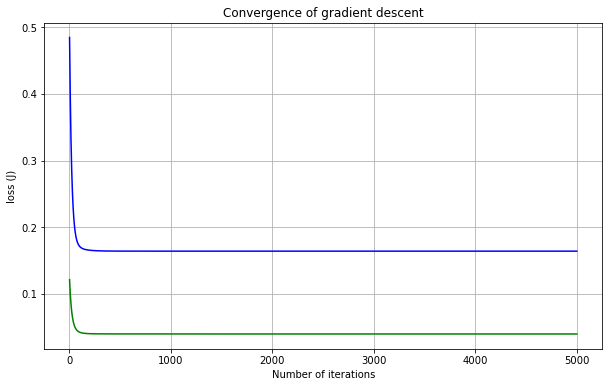

In [42]:
plt.plot(range(1, iterations +1), loss_history, color='blue')
plt.plot(range(1, iterations +1), t_loss_history, color='green')
plt.rcParams["figure.figsize"]= (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('loss (J)')
plt.title('Convergence of gradient descent')